In [ ]:
import pandas as pd
df = pd.read_excel("weather.xlsx", parse_dates=["Date"])
# pd.melt(df, id_vars=["Date"], var_name="City", value_name="Temp.")
df2 = pd.melt(df, id_vars=["Date"], var_name="City")

City:  (Timestamp('2011-03-05 00:00:00'), 'City')

Data:          Date  City      value
0 2011-03-05  City      Delhi
3 2011-03-05  City     Mumbai
6 2011-03-05  City  Bangalore
City:  (Timestamp('2011-03-05 00:00:00'), 'Humidity')

Data:           Date      City value
18 2011-03-05  Humidity    54
21 2011-03-05  Humidity    60
24 2011-03-05  Humidity    66
City:  (Timestamp('2011-03-05 00:00:00'), 'Temperature')

Data:           Date         City value
9  2011-03-05  Temperature    35
12 2011-03-05  Temperature    38
15 2011-03-05  Temperature    41
City:  (Timestamp('2011-03-06 00:00:00'), 'City')

Data:          Date  City      value
1 2011-03-06  City      Delhi
4 2011-03-06  City     Mumbai
7 2011-03-06  City  Bangalore
City:  (Timestamp('2011-03-06 00:00:00'), 'Humidity')

Data:           Date      City value
19 2011-03-06  Humidity    56
22 2011-03-06  Humidity    62
25 2011-03-06  Humidity    68
City:  (Timestamp('2011-03-06 00:00:00'), 'Temperature')

Data:           Date     

In [ ]:
df3 = pd.read_excel("survey.xlsx")
pd.crosstab([df3.Gender, df3.Nationality],df3.Handedness, margins=True, margins_name="Total", values=df3.Age, aggfunc="mean").interpolate().fillna(method="backfill")

C:\Users\admin\AppData\Local\Temp\ipykernel_13624\2682241180.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.crosstab([df3.Gender, df3.Nationality],df3.Handedness, margins=True, margins_name="Total", values=df3.Age, aggfunc="mean").interpolate().fillna(method="backfill")


Handedness           Left      Right  Total
Gender Nationality                         
Female Bangladesh   23.00  25.000000   25.0
       India        23.00  27.500000   26.0
       USA          22.50  27.000000   27.0
Male   Bangladesh   22.00  23.500000   22.0
       India        23.00  20.000000   20.0
       USA          24.00  22.666667   24.0
Total               23.25  25.333333   24.5

In [ ]:
import pandas as pd
df1 = pd.DataFrame(
    {
        "city": ["Delhi", "Mumbai", "Bangalore"],
        "temp": [35, 31, 29],
        "windspeed": [42, 56, 50]
    }
)
df2 = pd.DataFrame(
    {
        "city": ["New Jersey", "Chicago", "New York"],
        "temp": [36, 32, 30],
        "windspeed": [43, 57, 51]
    })
df = pd.concat([df1, df2], keys=["India", "US"])
df["India"]

KeyError: 'India'

In [ ]:
import pandas as pd
df = pd.read_csv("Test.csv")
# df[['Place', "Min. Temp."]][df["Min. Temp."] == df["Min. Temp."].max()]
# df.loc[df["AQI"] < 500]
# df.loc[df["Min. Temp."] > 28][df['AQI'] < 500]
# df[df['Min. Temp.'] > 30]
# df.set_index("Place", inplace=True)
# df.loc["Delhi"]

<ipython-input-20-9f47632d533e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["Min. Temp."] > 28][df['AQI'] < 500]


Index           1
Min. Temp.     35
Max. Temp.     47
AQI           999
Name: Delhi, dtype: int64

In [ ]:
import pandas as pd
df = pd.read_csv("Test.csv", na_values=["n.a."], parse_dates=["Day"])
df['Day'] = pd.to_datetime(df['Day'])
newdf = df.interpolate()

,Day,Windspeed,Temp.,Event
0,2003-11-10,10.0,23.0,sunny
1,2003-11-12,11.5,29.0,no event
2,2003-11-14,13.0,35.0,rain
3,2003-11-15,13.0,35.0,sunny


In [ ]:
import pandas as pd
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
'age': [20, 19, 22, 21],
'favorite_color': ['blue', 'blue', 'yellow', "green"],
'grade': [88, 92, 95, 70]}
df = pd.DataFrame(raw_data)
df.loc[df['favorite_color'] == 'yellow' ]

,name,age,favorite_color,grade
2,Omar Mullins,22,yellow,95


In [1]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,665 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,920 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
!pip install manim

In [ ]:
import py3Dmol

# Create a 3D view object
view = py3Dmol.view(width=400, height=400)

# Load benzene structure from PubChem (you can also load from file or string)
benzene_sdf = '''
  Mrv2014 02192015072D

 12 12  0  0  0  0            999 V2000
   -0.0000    1.4027    0.0000 C   0  0
   -1.2148    0.7013    0.0000 C   0  0
   -1.2148   -0.7013    0.0000 C   0  0
   -0.0000   -1.4027    0.0000 C   0  0
    1.2148   -0.7013    0.0000 C   0  0
    1.2148    0.7013    0.0000 C   0  0
   -0.0000    2.4903    0.0000 H   0  0
   -2.1567    1.2452    0.0000 H   0  0
   -2.1567   -1.2452    0.0000 H   0  0
   -0.0000   -2.4903    0.0000 H   0  0
    2.1567   -1.2452    0.0000 H   0  0
    2.1567    1.2452    0.0000 H   0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  5 11  1  0
  6 12  1  0
M  END
'''

# Add the benzene molecule to the viewer
view.addModel(benzene_sdf, 'sdf')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the molecule
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

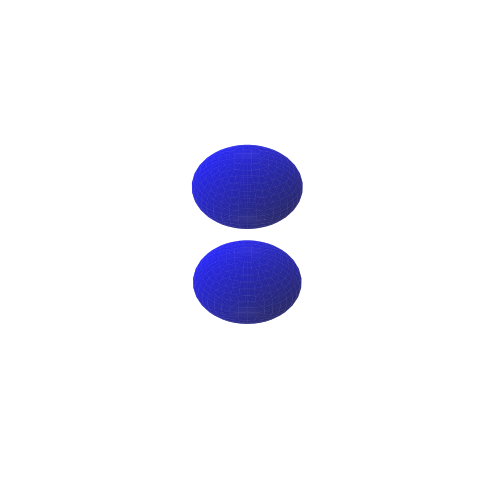

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Set up the figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create dumbbell shape (p-orbital)
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
r = 0.4

x1 = r * np.cos(u) * np.sin(v)
y1 = r * np.sin(u) * np.sin(v)
z1 = r * np.cos(v) + 0.6  # Upper lobe

x2 = r * np.cos(u) * np.sin(v)
y2 = r * np.sin(u) * np.sin(v)
z2 = r * np.cos(v) - 0.6  # Lower lobe

orbital1 = ax.plot_surface(x1, y1, z1, color='blue', alpha=0.6)
orbital2 = ax.plot_surface(x2, y2, z2, color='blue', alpha=0.6)

# Axis settings
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1.5, 1.5])
ax.set_box_aspect([1, 1, 1])
ax.axis('off')

# Update function for animation
def update(i):
    ax.view_init(elev=30, azim=i)
    return fig,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=360, interval=20)
# Save animation as GIF
ani.save("p_orbital.gif", writer='pillow',)

In [ ]:
%%manim -ql -v WARNING QuantumTunneling

from manim import *

class QuantumTunneling(Scene):
    def construct(self):
        # Axes setup
        axes = Axes(
            x_range=[-4, 4, 1],
            y_range=[0, 4, 1],
            x_length=8,
            y_length=3,
            axis_config={"include_tip": False}
        )
        axes.add_coordinates()
        self.play(Create(axes))

        # Potential Barrier
        barrier = axes.plot(lambda x: 3 if -0.5 < x < 0.5 else 0, color=RED)
        barrier_label = MathTex("V(x)").next_to(barrier, UP)
        self.play(Create(barrier), Write(barrier_label))

        # Wave Packet (incoming)
        wave_packet = always_redraw(
            lambda: axes.plot(lambda x: np.exp(-(x+2-self.time)**2) * np.cos(5*(x+2-self.time)), color=BLUE)
        )
        self.add(wave_packet)

        # Time tracking
        self.time = 0

        # Animate particle approaching and partially tunneling
        def update_wave(mob, dt):
            self.time += dt * 2  # Speed of wave

        wave_packet.add_updater(update_wave)
        self.wait(4)
        wave_packet.remove_updater(update_wave)


UsageError: Cell magic `%%manim` not found.


In [ ]:
# Create a scene in Manim using Python
code = '''
from manim import *
import numpy as np

class QuantumTunneling(Scene):
    def construct(self):
        # Axes setup
        axes = Axes(
            x_range=[-4, 4, 1],
            y_range=[0, 4, 1],
            x_length=8,
            y_length=3,
            axis_config={"include_tip": False}
        )
        self.play(Create(axes))

        # Potential Barrier
        barrier = Rectangle(width=1, height=3, color=RED, fill_opacity=0.5).move_to(axes.c2p(0, 1.5))
        self.play(Create(barrier))

        # Initialize time BEFORE using it
        self.time = 0

        # Wave Packet (incoming)
        wave_packet = always_redraw(
            lambda: axes.plot(
                lambda x: np.exp(-(x + 2 - self.time)**2) * np.cos(5 * (x + 2 - self.time)),
                color=BLUE
            )
        )
        self.add(wave_packet)

        # Animate particle approaching and partially tunneling
        def update_wave(mob, dt):
            self.time += dt * 2  # Speed of wave

        wave_packet.add_updater(update_wave)
        self.wait(4)
        wave_packet.remove_updater(update_wave)
'''

# Save it to a .py file
with open("/content/quantum_tunneling.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING quantum_tunneling.py QuantumTunneling

Manim Community v0.17.0

You are using manim version v0.17.0, but version v0.19.0 is available.
You should consider upgrading via pip install -U manim


In [ ]:
from manim import *

class EvaporationScene(Scene):
    def construct(self):
        # Title
        title = Text("Evaporation Process", font_size=40).to_edge(UP)
        self.play(Write(title))

        # Draw sun
        sun = Circle(radius=0.7, color=YELLOW, fill_opacity=1).to_corner(UR)
        sun_rays = VGroup(*[
            Line(sun.get_center(), sun.get_center() + angle*0.5).set_color(YELLOW)
            for angle in [RIGHT, UP, LEFT, DOWN, UR, UL, DR, DL]
        ])
        self.play(FadeIn(sun), *[Create(ray) for ray in sun_rays])

        # Draw water puddle
        puddle = Ellipse(width=4, height=1, color=BLUE, fill_opacity=0.5).shift(DOWN * 2.5)
        self.play(FadeIn(puddle))

        # Evaporating droplets
        droplets = [Dot(color=BLUE).move_to(puddle.get_top() + UP * i * 0.5) for i in range(1, 6)]
        for dot in droplets:
            self.play(FadeIn(dot), dot.animate.shift(UP*2).set_opacity(0.3), run_time=1)

        # Text label
        evaporation_text = Text("Water turns into vapor", font_size=28).next_to(puddle, UP)
        self.play(Write(evaporation_text))
        self.wait(2)


In [21]:
# Create a scene in Manim using Python
code = '''
from manim import *

class EvaporationScene(Scene):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.camera.background_color = WHITE  # Light mode

    def construct(self):
        # Title
        title = Text("Evaporation Process Example", font_size=40, color=BLACK).to_edge(UP)
        self.play(Write(title))

        # Sun
        sun = Circle(radius=0.7, color=YELLOW, fill_opacity=1).to_corner(UR)
        sun_rays = VGroup(*[
            Line(sun.get_center(), sun.get_center() + angle*0.5).set_color(YELLOW)
            for angle in [RIGHT, UP, LEFT, DOWN, UR, UL, DR, DL]
        ])
        self.play(FadeIn(sun), *[Create(ray) for ray in sun_rays])

        # Water puddle
        puddle = Ellipse(width=4, height=1, color=BLUE, fill_opacity=0.5).shift(DOWN * 2.5)
        self.play(FadeIn(puddle))

        # Vapor animation
        for _ in range(6):
            vapor_groups = []
            for i in range(-2, 3):
                group = VGroup()
                for j in range(3):
                    dot = Dot(color=BLUE, radius=0.05).move_to(
                        puddle.get_top() + RIGHT * i * 0.5 + UP * j * 0.2
                    )
                    self.add(dot)
                    group.add(dot)
                vapor_groups.append(group)

            animations = [group.animate.shift(UP * 2).set_opacity(0) for group in vapor_groups]
            self.play(*animations, run_time=1.2)
            self.wait(0.2)

        # Fade out puddle after evaporation
        self.play(FadeOut(puddle), run_time=1)

        # Label
        evaporation_text = Text("Water turns into vapor", font_size=28, color=BLACK).next_to(puddle, UP)
        self.play(Write(evaporation_text))
        self.wait(2)
'''

# Save it to a .py file
with open("/content/evaporation.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation.py EvaporationScene

Manim Community v0.19.0



In [ ]:
code = '''
from manim import *

class EvaporationFactorsScene(Scene):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.camera.background_color = WHITE  # Light mode

    def construct(self):
        # Title
        title = Text("Factors Affecting Evaporation", font_size=36, color=BLACK).to_edge(UP)
        self.play(Write(title))

        # ——— 1. Surface Area ———
        label_sa = Text("Surface Area ↑ ⇒ Faster Evaporation", font_size=24, color=BLACK).shift(UP * 0.5)
        # Two puddles: narrow vs wide, aligned at y = -1.5
        narrow = Ellipse(width=2, height=0.8, color=BLUE, fill_opacity=0.5).move_to(LEFT * 3 + DOWN * 1.5)
        wide   = Ellipse(width=4, height=0.8, color=BLUE, fill_opacity=0.5).move_to(RIGHT * 3 + DOWN * 1.5)
        self.play(FadeIn(narrow), FadeIn(wide), Write(label_sa))
        # Steam puffs: 2 from narrow, 5 from wide
        puffs = VGroup()
        for puddle, count in [(narrow, 2), (wide, 5)]:
            for k in range(count):
                dot = Dot(radius=0.07, color=BLUE).move_to(
                    puddle.get_top() + UP * 0.2 + RIGHT * ((k - (count-1)/2) * 0.3)
                )
                self.add(dot)
                puffs.add(dot)
        # Animate all puffs rising and fading
        self.play(
            *[dot.animate.shift(UP * 1).set_opacity(0) for dot in puffs],
            run_time=1.2
        )
        self.wait(1)
        self.play(FadeOut(narrow, wide, label_sa, puffs))

        # ——— 2. Wind Speed ———
        label_wind = Text("Wind Speed ↑ ⇒ Molecules Carried Away, Rate of Evaporation ↑", font_size=24, color=BLACK).shift(UP * 0.5)
        self.play(Write(label_wind))
        puddle2 = Ellipse(width=3, height=0.8, color=BLUE, fill_opacity=0.5).shift(DOWN * 1.5)
        self.play(FadeIn(puddle2))
        arrow = Arrow(LEFT * 5 + DOWN * 1.5, LEFT * 1 + DOWN * 1.5, buff=0).set_color(GRAY)
        vapors = VGroup(*[
            Dot(color=BLUE).move_to(puddle2.get_top() + UP * 0.2 + RIGHT * i * 0.4)
            for i in range(5)
        ])
        self.play(Create(arrow), FadeIn(vapors))
        self.play(vapors.animate.shift(RIGHT * 3).set_opacity(0), run_time=1.5)
        self.wait(1)
        self.play(FadeOut(puddle2, arrow, vapors, label_wind))

        # ——— 3. Temperature ———
        label_temp = Text("Temperature ↑ ⇒ Evaporation Rate ↑", font_size=24, color=BLACK).shift(UP * 0.5)
        self.play(Write(label_temp))
        # Draw thermometer: tube + bulb
        tube = Rectangle(width=0.3, height=3, color=BLACK).next_to(LEFT * 3 + DOWN * 1.5, RIGHT, buff=0)
        bulb = Circle(radius=0.35, color=BLACK).next_to(tube, DOWN, buff=0)
        mercury = VGroup(
            Rectangle(width=0.2, height=1, fill_color=RED, fill_opacity=1).move_to(tube.get_bottom() + UP * 0.5),
            Circle(radius=0.25, fill_color=RED, fill_opacity=1).move_to(bulb.get_center())
        )
        self.play(FadeIn(tube), FadeIn(bulb), FadeIn(mercury))
        # Puddle with increasing vapor bursts
        puddle3 = Ellipse(width=3, height=0.8, color=BLUE, fill_opacity=0.5).shift(RIGHT * 1 + DOWN * 1.5)
        self.play(FadeIn(puddle3))
        for n in (2, 4, 6):
            dots = VGroup(*[
                Dot(color=BLUE).move_to(puddle3.get_top() + UP * 0.2 + RIGHT * ((i - (n-1)/2) * 0.3))
                for i in range(n)
            ])
            self.add(dots)
            self.play(dots.animate.shift(UP * 1.5).set_opacity(0), run_time=1)
            self.wait(0.3)
        self.wait(1)
        self.play(FadeOut(puddle3, tube, bulb, mercury, label_temp))

        # ——— Summary ———
        summary = BulletedList(
            "↑ Surface Area → ↑ Evaporation",
            "↑ Wind Speed → Molecules Removed",
            "↑ Temperature → Molecules Escape Faster",
            font_size=24
        ).scale(0.9)
        for item in summary:
            item.set_color(BLACK)
        self.play(FadeIn(summary))
        self.wait(2)
'''
# Save it to a .py file
with open("/content/evaporation_factors.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_factors.py EvaporationFactorsScene

Manim Community v0.19.0



In [2]:
code = '''
from manim import *

class UsesOfEvaporationScene(Scene):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.camera.background_color = WHITE

    def construct(self):
        # ——— Title + Sun ———
        title = Text("Uses of Evaporation", font_size=48, color=BLACK).to_edge(UP)
        sun = Circle(
            radius=0.6,
            stroke_color=YELLOW,
            fill_color=YELLOW,
            fill_opacity=1
        ).to_corner(UR)
        sun_rays = VGroup(*[
            Line(
                start=sun.get_center(),
                end=sun.get_center() + d * 0.5,
                stroke_color=YELLOW
            )
            for d in [UP, RIGHT, DOWN, LEFT, UR, UL, DR, DL]
        ])
        self.play(Write(title), FadeIn(sun), *[Create(r) for r in sun_rays])
        self.wait(1)

        # ——— 1. Cloud Formation ———
        u1 = Text("1. Cloud Formation", font_size=36, color=BLACK)\
             .to_edge(UP).shift(DOWN * 0.9)
        water1 = Rectangle(
            width=4, height=0.5,
            stroke_color=BLUE,
            fill_color=BLUE,
            fill_opacity=0.5
        ).move_to(DOWN * 1)
        label_w1 = Text("Water Body", font_size=24, color=BLACK)\
                  .next_to(water1, DOWN)
        vapors1 = VGroup(*[
            Dot(radius=0.1, color=BLUE)
            .move_to(water1.get_top() + UP * 0.2 + RIGHT * (i - 2) * 0.4)
            for i in range(5)
        ])
        cloud = VGroup(
            Circle(radius=0.5, fill_color=GREY, fill_opacity=0.7).move_to(UP * 1.5 + LEFT),
            Circle(radius=0.6, fill_color=GREY, fill_opacity=0.7).move_to(UP * 1.7),
            Circle(radius=0.5, fill_color=GREY, fill_opacity=0.7).move_to(UP * 1.5 + RIGHT)
        )
        expl1 = Text("Vapor rises and forms clouds", font_size=24, color=BLACK)\
                .to_edge(DOWN).shift(UP * 0.5)

        self.play(FadeIn(u1), FadeIn(water1), FadeIn(label_w1))
        self.play(FadeIn(vapors1))
        self.play(vapors1.animate.shift(UP * 2).set_opacity(0), run_time=3)
        self.play(FadeIn(cloud), Write(expl1))
        self.wait(2)
        self.play(FadeOut(u1, water1, label_w1, vapors1, cloud, expl1))

        # ——— 2. Cooling Effect of Sweating ———
        u2 = Text("2. Cooling Effect of Sweating", font_size=36, color=BLACK)\
             .to_edge(UP).shift(DOWN * 0.9)
        skin = Rectangle(
            width=2, height=1,
            stroke_color=ORANGE,
            fill_color=ORANGE,
            fill_opacity=0.7
        ).move_to(ORIGIN)
        label_skin = Text("Skin Surface", font_size=24, color=BLACK)\
                     .next_to(skin, DOWN)
        sweat = Dot(radius=0.1, color=BLUE)\
                .move_to(skin.get_top() + UP * 0.15)
        label_sweat = Text("Sweat", font_size=24, color=BLACK)\
                      .next_to(sweat, RIGHT)
        expl2 = Text("Evaporation of sweat cools the body", font_size=24, color=BLACK)\
                .to_edge(DOWN).shift(UP * 0.5)

        self.play(FadeIn(u2), FadeIn(skin), FadeIn(label_skin))
        self.play(FadeIn(sweat), Write(label_sweat))
        self.play(sweat.animate.shift(UP * 2).set_opacity(0), run_time=3)
        self.play(Write(expl2))
        self.wait(2)
        self.play(FadeOut(u2, skin, label_skin, sweat, label_sweat, expl2))

        # ——— 3. Salt Extraction ———
        u3 = Text("3. Salt Extraction", font_size=36, color=BLACK)\
             .to_edge(UP).shift(DOWN * 0.9)
        pan = Rectangle(
            width=3, height=1,
            stroke_color=GREY,
            fill_color=GREY,
            fill_opacity=0.4
        ).move_to(ORIGIN)
        label_pan = Text("Seawater in Pan", font_size=24, color=BLACK)\
                    .next_to(pan, UP)
        arrow3 = Arrow(
            start=pan.get_center() + DOWN * 0.5,
            end=pan.get_center() + UP * 1 + RIGHT * 1,
            stroke_color=BLACK
        )
        salt = VGroup(*[
            Square(
                side_length=0.2,
                stroke_color=BLACK,
                fill_color=WHITE,
                fill_opacity=1
            ).move_to(
                pan.get_bottom() + DOWN * 0.3 + RIGHT * (i - 2) * 0.3
            )
            for i in range(5)
        ])
        expl3 = Text("Evaporation leaves salt crystals behind", font_size=24, color=BLACK)\
                .to_edge(DOWN).shift(UP * 0.5)

        self.play(FadeIn(u3), FadeIn(pan), FadeIn(label_pan))
        self.play(GrowArrow(arrow3), run_time=1)
        self.play(pan.animate.set_opacity(0), run_time=2)
        self.play(*[FadeIn(c) for c in salt], Write(expl3))
        self.wait(2)
        self.play(FadeOut(u3, pan, label_pan, arrow3, *salt, expl3))

        # ——— 4. Drying of Clothes ———
        u4 = Text("4. Drying of Clothes", font_size=36, color=BLACK)\
             .to_edge(UP).shift(DOWN * 0.9)
        line = Line(LEFT * 3, RIGHT * 3, stroke_width=4, stroke_color=BLACK).shift(UP * 0.5)
        label_line = Text("Clothesline", font_size=24, color=BLACK)\
                     .next_to(line, UP)
        cloth = Rectangle(
            width=1.5, height=1,
            stroke_color=RED,
            fill_color=RED,
            fill_opacity=0.7
        ).next_to(line, DOWN, buff=0)
        label_cloth = Text("Wet Clothes", font_size=24, color=BLACK)\
                      .next_to(cloth, DOWN)
        vap4 = VGroup(*[
            Dot(radius=0.1, color=BLUE)
            .move_to(cloth.get_top() + UP * 0.2 + RIGHT * (i - 2) * 0.3)
            for i in range(5)
        ])
        expl4 = Text("Evaporation dries the clothes", font_size=24, color=BLACK)\
                .to_edge(DOWN).shift(UP * 0.5)

        self.play(FadeIn(u4), FadeIn(line), FadeIn(label_line),
                  FadeIn(cloth), FadeIn(label_cloth))
        self.play(FadeIn(vap4))
        self.play(vap4.animate.shift(UP * 2).set_opacity(0), run_time=3)
        self.play(Write(expl4))
        self.wait(2)

        # ——— Final Summary ———
        summary = BulletedList(
            "Cloud Formation",
            "Cooling Effect of Sweating",
            "Salt Extraction",
            "Drying of Clothes",
            font_size=30
        ).scale(0.8)
        for item in summary:
            item.set_color(BLACK)
        summary.next_to(ORIGIN, DOWN)
        self.play(
            FadeOut(u4, line, label_line, cloth, label_cloth, vap4, expl4),
            FadeIn(summary)
        )
        self.wait(3)
'''
# Save it to a .py file
with open("/content/evaporation_uses.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_uses.py UsesOfEvaporationScene

Manim Community v0.19.0



In [12]:
code = '''
from manim import *

class EvaporationCoolingFullScene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # Scene Title
        title = Text("Evaporation Causes Cooling Effect", font_size=48, color=BLACK).to_edge(UP)
        self.play(Write(title))
        self.wait(1)

        self.sweating_scene()
        self.perfume_scene()
        self.matka_scene()

        # Summary
        summary = Text("Evaporation takes away heat → Cooling effect", font_size=36, color=BLACK)
        self.play(Write(summary))
        self.wait(3)

    def show_example_label(self, text):
        label = Text(text, font_size=34, color=BLACK).to_edge(UP).shift(DOWN)
        self.play(FadeIn(label))
        return label

    def sweating_scene(self):
        label = self.show_example_label("1. Sweating cools the body")

        # Skin & sweat
        skin = Rectangle(width=4, height=1, fill_color="#FAD7A0", fill_opacity=1).shift(DOWN * 2)
        sweat_drops = VGroup(*[
            Dot(radius=0.12, color=BLUE).move_to(skin.get_top() + RIGHT * x * 0.8 + UP * 0.2)
            for x in [-1, 0, 1]
        ])
        self.play(FadeIn(skin), FadeIn(sweat_drops))
        self.wait(1)

        vapors = VGroup(*[
            Dot(radius=0.07, color=BLUE).move_to(drop.get_center()) for drop in sweat_drops
        ])
        self.play(FadeIn(vapors))
        self.play(vapors.animate.shift(UP * 2).set_opacity(0), run_time=2)
        self.wait(1)

        self.play(FadeOut(skin), FadeOut(sweat_drops), FadeOut(vapors), FadeOut(label))

    def perfume_scene(self):
        label = self.show_example_label("2. Perfume gives a cooling effect")

        # Hand
        skin = Rectangle(width=3, height=1, fill_color="#FAD7A0", fill_opacity=1).shift(DOWN * 1.5 + RIGHT * 2)
        self.play(FadeIn(skin))

        # Perfume bottle
        bottle = Rectangle(width=0.5, height=1, fill_color=GRAY, fill_opacity=1).shift(LEFT * 2)
        nozzle = Line(bottle.get_top(), bottle.get_top() + UP * 0.3, color=BLACK)
        self.play(FadeIn(bottle), Create(nozzle))

        # Spray cloud
        spray_dots = VGroup(*[
            Dot(radius=0.07, color=BLUE).move_to(bottle.get_top() + RIGHT * 0.2 * i + UP * 0.1 * i)
            for i in range(5)
        ])
        self.play(FadeIn(spray_dots))
        self.play(spray_dots.animate.shift(RIGHT * 3.5 + DOWN * 0.3).set_opacity(0), run_time=2)
        self.wait(1)

        self.play(FadeOut(bottle), FadeOut(nozzle), FadeOut(skin), FadeOut(spray_dots), FadeOut(label))

    def matka_scene(self):
        label = self.show_example_label("3. Matka keeps water cool")

        # Pot
        base = Ellipse(width=2.5, height=1.5, fill_color="#8B4513", fill_opacity=1).shift(DOWN * 1.5)
        mid = Ellipse(width=1.8, height=1.2, fill_color="#A0522D", fill_opacity=1).next_to(base, UP, buff=0)
        neck = Rectangle(width=0.6, height=0.6, fill_color="#A0522D", fill_opacity=1).next_to(mid, UP, buff=0)
        pot = VGroup(base, mid, neck)

        # Water inside pot base
        water = Ellipse(width=1.5, height=0.4, fill_color=BLUE, fill_opacity=0.8).move_to(base.get_center()).shift(UP * 0.3)

        # Sun
        sun = Circle(radius=0.4, color=YELLOW, fill_opacity=1).to_corner(UR)
        rays = VGroup(*[
            Line(sun.get_center(), sun.get_center() + angle * 0.6, color=YELLOW)
            for angle in [RIGHT, UP, LEFT, DOWN, UL, UR, DL, DR]
        ])

        # Labels
        water_label = Text("Water", font_size=24, color=BLUE).next_to(water, DOWN)
        clay_label = Text("Clay walls", font_size=24, color=BLACK).next_to(base, LEFT)

        self.play(FadeIn(pot), FadeIn(water), Write(water_label), Write(clay_label))
        self.play(FadeIn(sun), *[Create(ray) for ray in rays])
        self.wait(1)

        # Vapors rising from neck
        vapors = VGroup(*[
            Dot(radius=0.07, color=BLUE).move_to(neck.get_top() + UP * 0.1 + RIGHT * (i - 2) * 0.25)
            for i in range(5)
        ])
        self.play(FadeIn(vapors))
        self.play(vapors.animate.shift(UP * 2).set_opacity(0), run_time=2)
        self.wait(1)

        self.play(FadeOut(pot), FadeOut(water), FadeOut(water_label), FadeOut(clay_label),
                  FadeOut(sun), FadeOut(rays), FadeOut(vapors), FadeOut(label))

'''
# Save it to a .py file
with open("/content/evaporation_cool.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_cool.py EvaporationCoolingFullScene


Manim Community v0.19.0



In [40]:
code = '''
from manim import *

class EvaporationNCERT(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # Title
        title = Text("How Evaporation Works", font_size=48, color=BLACK).to_edge(UP)
        self.play(Write(title))
        self.wait(1)

        # Container
        container = RoundedRectangle(width=5.5, height=2.5, corner_radius=0.1, color=BLACK).shift(DOWN * 1.5)
        water = Rectangle(width=5.3, height=1.2, color=BLUE, fill_opacity=0.5).next_to(container.get_bottom(), UP, buff=0)
        self.play(Create(container), FadeIn(water))

        # Label: Water
        water_label = Text("Water", font_size=24, color=BLUE).next_to(water, DOWN)
        self.play(FadeIn(water_label))

        # Water molecules
        molecules = VGroup(*[
            Dot(color=BLUE, radius=0.1).move_to(
                water.get_corner(UL) + RIGHT * (i % 5) * 1.1 + UP * (i // 5) * 0.3
            ) for i in range(10)
        ])
        self.play(FadeIn(molecules))
        self.wait(1)

        # Sun
        sun = Circle(radius=0.4, color=YELLOW, fill_opacity=1).to_corner(UR)
        rays = VGroup(*[
            Line(sun.get_center(), sun.get_center() + angle * 0.5, color=YELLOW)
            for angle in [UP, UR, RIGHT]
        ])
        sun_label = Text("Sun", font_size=24, color=BLACK).next_to(sun, DOWN)
        self.play(FadeIn(sun), *[Create(ray) for ray in rays], FadeIn(sun_label))
        self.wait(1)

        # Heat label
        heat_text = Text("Heat energy from sun increases temperature", font_size=28, color=BLACK).shift(DOWN * 0.2)
        self.play(Write(heat_text))
        self.wait(2)
        self.play(FadeOut(heat_text))

        # Molecule escaping
        escape = Dot(color=BLUE, radius=0.1).move_to(molecules[2].get_center())
        arrow = Arrow(escape.get_center(), escape.get_center() + UP * 2.5, buff=0.1, color=RED)
        escape_label = Text("Evaporation", font_size=24, color=BLACK).next_to(arrow, RIGHT)

        self.play(Create(arrow), FadeIn(escape_label))
        self.play(escape.animate.shift(UP * 2.5).set_opacity(0), run_time=2)
        self.wait(1)

        # Bottom explanation
        explain = Text(
            "Only surface particles with enough energy escape as vapour.",
            font_size=30,
            color=BLACK
        ).next_to(container, DOWN, buff=1).shift(UP * 0.7)
        self.play(Write(explain))
        self.wait(3)

        self.play(*[FadeOut(m) for m in [title, container, water, water_label, molecules, sun, rays, sun_label, arrow, escape_label, explain]])
'''

# Save it to a .py file
with open("/content/evaporation_work.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_work.py EvaporationNCERT

Manim Community v0.19.0



In [23]:
code = '''
from manim import *

class EvaporationQuiz(Scene):
    def show_question(self, question_text, options, correct_index):
        # Heading remains fixed
        heading = Text("Evaporation Quiz", font_size=48, color=BLACK).to_edge(UP)

        # Question centered below heading
        question = Text(question_text, font_size=36, color=BLACK).next_to(heading, DOWN, buff=0.5)

        # Position options below the question with vertical spacing
        option_mobs = VGroup()
        for i, opt in enumerate(options):
            opt_text = Text(f"{chr(65 + i)}. {opt}", font_size=30, color=BLACK)
            option_mobs.add(opt_text)

        option_mobs.arrange(DOWN, aligned_edge=LEFT, center=False).next_to(question, DOWN, buff=0.6)

        # Show everything
        self.play(Write(heading))
        self.play(Write(question), *[Write(opt) for opt in option_mobs])
        self.wait(2)

        # Highlight correct option
        correct_option = option_mobs[correct_index]
        highlight = SurroundingRectangle(correct_option, color=GREEN)
        self.play(Create(highlight))
        self.wait(2)

        # Fade out question and options but keep heading
        self.play(FadeOut(question), FadeOut(option_mobs), FadeOut(highlight))

    def construct(self):
        self.camera.background_color = WHITE

        questions = [
            ("Evaporation is a surface phenomenon because:",
             ["Only surface molecules escape",
              "Heat is applied only at the surface",
              "Air touches only the surface",
              "Molecules inside are heavy"], 0),

            ("Which factor does NOT increase evaporation?",
             ["Wind speed",
              "Humidity",
              "Surface area",
              "Temperature"], 1),

            ("Evaporation causes cooling because:",
             ["It absorbs oxygen",
              "It absorbs heat from surroundings",
              "It condenses water",
              "It radiates sunlight"], 1),

            ("Which of these is an example of evaporation?",
             ["Boiling water",
              "Melting ice",
              "Sweating",
              "Condensation"], 2),

            ("Drying of wet clothes is faster in:",
             ["Humid air",
              "Windy and sunny day",
              "Closed room",
              "Winter evening"], 1),

            ("When evaporation occurs:",
             ["Temperature increases",
              "Molecules lose energy",
              "High-energy molecules escape",
              "Water turns to ice"], 2),

            ("Which change is observed due to evaporation?",
             ["Increase in pressure",
              "Cooling of surface",
              "Decrease in humidity",
              "Formation of clouds"], 1),

            ("Evaporation can happen at:",
             ["Only 100°C",
              "Any temperature below boiling",
              "Freezing point",
              "Condensation point"], 1),

            ("Which container will show maximum evaporation?",
             ["Closed box",
              "Narrow glass",
              "Wide tray",
              "Covered bowl"], 2),

            ("Evaporation is faster when:",
             ["Air is humid",
              "Wind speed is low",
              "Surface area is more",
              "Temperature is low"], 2),
        ]

        for q in questions:
            self.show_question(*q)
'''
# Save it to a .py file
with open("/content/evaporation_quiz.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_quiz.py EvaporationQuiz

Manim Community v0.19.0



In [19]:
code = '''
from manim import *

class EvaporationIntroScene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # Heading
        heading = Text("Evaporation", font_size=60, color=BLACK).to_edge(UP)

        # Student Info
        name = Text("Name: Tannmay Khandelwal", font_size=36, color=BLACK)
        student_class = Text("Class: IX-E", font_size=36, color=BLACK).next_to(name, DOWN, aligned_edge=LEFT)

        info_group = VGroup(name, student_class).move_to(DOWN * 0.5)

        # Animate
        self.play(Write(heading))
        self.wait(0.5)
        self.play(FadeIn(info_group, shift=UP))
        self.wait(2)
'''
# Save it to a .py file
with open("/content/evaporation_intro.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_intro.py EvaporationIntroScene

Manim Community v0.19.0



In [37]:
code = '''
from manim import *

class WhatIsEvaporation(Scene):
    def construct(self):
        # Set background to light mode
        self.camera.background_color = WHITE

        # Title
        title = Text("What is Evaporation?", font_size=60, color=BLUE)
        self.play(Write(title))
        self.wait(1)
        self.play(title.animate.to_edge(UP))

        # Definition
        definition = Text(
            "Evaporation is the process by which a\\n"
            "liquid changes into a gas\\n"
            "at temperatures below its boiling point.",
            font_size=32,
            color=BLACK
        ).next_to(title, DOWN, buff=0.5)
        self.play(FadeIn(definition, shift=UP))
        self.wait(3)  # Increased wait time for definition to stay on screen

        # Surface molecules animation
        self.play(FadeOut(definition))
        molecules = VGroup(*[Dot(color=BLUE) for _ in range(20)]).arrange_in_grid(rows=4, buff=0.5)
        liquid = Rectangle(width=5, height=2, color=BLUE).shift(DOWN * 2)

        self.play(FadeIn(liquid), FadeIn(molecules))
        self.wait(1)

        # Simulate molecules escaping
        escaping = molecules[:].copy()
        self.play(*[m.animate.shift(UP * 4) for m in escaping], run_time=2)
        self.play(FadeOut(*escaping))
        self.wait(0.5)

        escape_label = Text("Surface molecules escape as vapor", font_size=28, color=BLACK).next_to(liquid, UP)
        self.play(FadeIn(escape_label))
        self.wait(2)
        self.play(FadeOut(escape_label), FadeOut(molecules), FadeOut(liquid))

        # Cooling Effect
        cool_text = Text("Evaporation causes cooling!", font_size=40, color=TEAL)
        cool_explain = Text(
            "High-energy molecules leave → Average energy drops → Temperature falls",
            font_size=21,
            color=BLACK
        ).next_to(cool_text, DOWN, buff=0.5)

        self.play(Write(cool_text))
        self.play(FadeIn(cool_explain))
        self.wait(4)  # Increased wait time for cooling effect text

        self.play(FadeOut(cool_text), FadeOut(cool_explain))

        # Examples
        example_title = Text("Examples of Evaporation", font_size=48, color=YELLOW)
        self.play(Write(example_title))
        self.wait(1)
        self.play(example_title.animate.to_edge(DOWN))  # Moved title down to avoid overlap

        examples = BulletedList(
            "Sweating cools the body",
            "Clothes drying under the sun",
            "Perfume vanishing quickly",
            font_size=30,
            color=BLACK
        ).next_to(example_title, UP, buff=0.5).shift(UP * 1.5)

        self.play(FadeIn(examples, shift=UP))
        self.wait(6)  # Increased wait time for examples to stay on screen
        self.play(FadeOut(example_title), FadeOut(examples))


'''
# Save it to a .py file
with open("/content/evaporation_what.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_what.py WhatIsEvaporation

Manim Community v0.19.0



In [39]:
code = '''
from manim import *

class EvaporationOutro(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # Thank You Text
        thank_you_text = Text("Thank You!", font_size=72, color=BLUE).move_to(ORIGIN)
        sub_text = Text("Keep Exploring Science!", font_size=36, color=BLACK).next_to(thank_you_text, DOWN, buff=0.5)

        self.play(Write(thank_you_text))
        self.wait(1)
        self.play(FadeIn(sub_text, shift=UP))
        self.wait(3)

        # Fade out
        self.play(FadeOut(thank_you_text), FadeOut(sub_text))

'''
# Save it to a .py file
with open("/content/evaporation_outro.py", "w") as file:
    file.write(code)

# Render the scene using the Manim CLI command
!manim -ql -v WARNING evaporation_outro.py EvaporationOutro

Manim Community v0.19.0

